In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
#Values in parameter search for thermal conductivity, heat flux, sulphur composition, cmb radius
q_cmb_array = [1, 5, 10]        #mW/m^2
S_array     = [0.05, 0.1, 0.15]
r_cmb_array = [300,500,800] #km

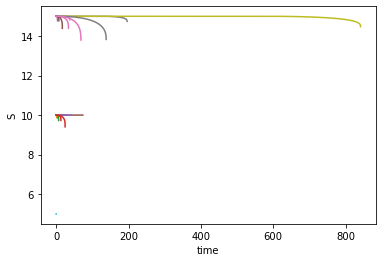

In [5]:

#Loop over all files

#For this example, we'll plot the S concentration of the bulk core through time for all models

for q in q_cmb_array:
    for S in S_array:
        for r_cmb in r_cmb_array:

            file =  f'../{r_cmb}km/output/S={S*100:.0f}_q={q:.0f}_FAILED.pik'  #Naming format used to save the files

            data = pickle.load(open(file, 'rb'))
            core = data['core']

            time = core['time']/(1e6*data['parameters']['ys']) #Time converted from s to Myrs
            conc_l = core['conc_l']*100  #convert to wt %

            plt.plot(time, conc_l, label='{r_cmb} km, k={k:.0f}, S={S*100:.0f}, q={q:.0f}')

plt.xlabel('time')
plt.ylabel('S')
plt.show()


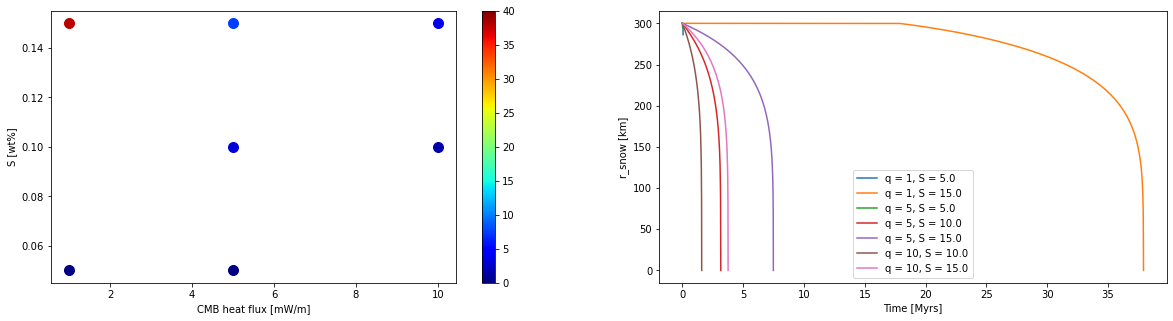

In [8]:
#Loop over all sulphur compositions and heat fluxes, plotting time for snow zone to fully cover core.

t_snow = np.zeros((len(q_cmb_array), len(S_array), len(r_cmb_array)))

r_cmb = 300

plt.figure(figsize=(20,5))
for q in q_cmb_array:
    for S in S_array:
        try:
            file =  f'../{r_cmb}km/output/S={S*100:.0f}_q={q:.0f}_FAILED.pik'  #Naming format used to save the files

            data = pickle.load(open(file, 'rb'))
            core = data['core']

            time = core['time']/(1e6*data['parameters']['ys']) #Final time converted from s to Myrs
            
            #Check to see if large snow zone formed
            r_snow = core['r_snow']/1000 #convert to km

            #Only choose those models with thick snow zones. Some models may not have grown them (thermal stratification raised CMB temp or model was not iterated for long enough)
            #Note that the model stops just before r_snow=0, so snow zones are one iteration away from comprising the entire core.
            if r_snow[-1] < r_cmb/1:
                plt.subplot(1,2,1)
                plt.scatter(q, S, s=100, c=time[-1], cmap='jet', vmin=0, vmax=40)

                plt.subplot(1,2,2)
                plt.plot(time, r_snow, label=f'q = {q}, S = {S*100}')

            else:
                print(f'k = {k}, S = {S*100} didn\'t make it')
            

        except:
            pass
plt.subplot(1,2,1)
plt.colorbar()
plt.xlabel('CMB heat flux [mW/m]')
plt.ylabel('S [wt%]')

plt.subplot(1,2,2)
plt.xlabel('Time [Myrs]')
plt.ylabel('r_snow [km]')
plt.legend(loc=0)
plt.show()


3.4